In [1]:
import pandas
import matplotlib.pyplot

%matplotlib notebook

In [2]:
community_df = pandas.read_table('data/dwpc-neo4j-community-2.3.1.tsv.gz')
enterprise_df = pandas.read_table('data/dwpc-neo4j-enterprise-2.3.1.tsv.gz')
community_df = community_df.rename(columns={'seconds': 'seconds_community'})
enterprise_df = enterprise_df.rename(columns={'seconds': 'seconds_enterprise'})
primary_keys = ['compound_id', 'disease_id', 'metapath']
community_df = community_df[primary_keys + ['seconds_community']]
enterprise_df = enterprise_df[primary_keys + ['seconds_enterprise']]

In [3]:
merged_df = community_df.merge(enterprise_df)
merged_df = merged_df.iloc[1000:, :]
merged_df.head()

,compound_id,disease_id,metapath,seconds_community,seconds_enterprise
1000,DB00093,DOID:1319,CdGiGeGuD,0.11870,0.08188
1001,DB00093,DOID:1319,CbGkd>G<kuGdD,0.08826,0.08142
1002,DB00093,DOID:1319,CuG<kdGdAlD,0.11120,0.07445
1003,DB00093,DOID:1319,CbG<odGku>GdD,0.11680,0.07279
1004,DB00093,DOID:1319,CsCbGuAlD,0.08000,0.19360


In [4]:
# Total execution time in hours
merged_df[['seconds_community', 'seconds_enterprise']].sum() / 60 / 60

seconds_community     7.297999
seconds_enterprise    7.475869
dtype: float64

<IPython.core.display.Javascript object>


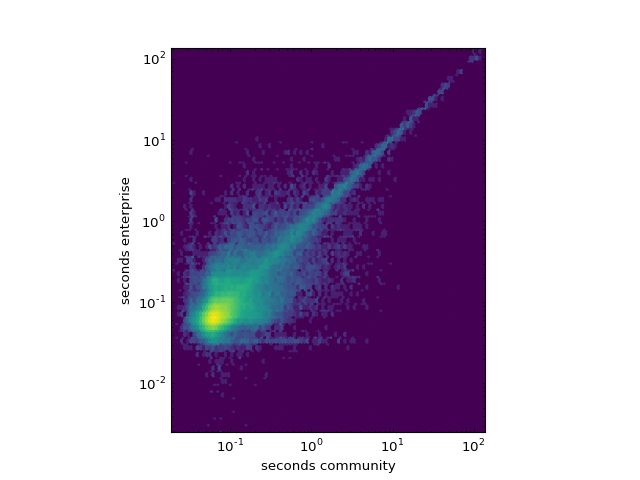

In [6]:
polycol = matplotlib.pyplot.hexbin(
    x = merged_df.seconds_community,
    y = merged_df.seconds_enterprise,
    xscale = 'log', yscale = 'log', bins = 'log',
    cmap = matplotlib.cm.get_cmap('viridis')
)
polycol.axes.set_aspect('equal')
matplotlib.pyplot.xlabel('seconds community');
matplotlib.pyplot.ylabel('seconds enterprise');